In [1]:
# We import all our dependencies.
from n2v.models import N2VConfig, N2V
import numpy as np
from csbdeep.utils import plot_history
from n2v.internals.N2V_DataGenerator import N2V_DataGenerator
from matplotlib import pyplot as plt

2024-04-16 11:54:48.802258: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-16 11:54:48.834066: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-16 11:54:48.834431: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-16 11:54:49.427555: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
datagen = N2V_DataGenerator()
img = datagen.load_imgs_from_directory(directory="./../../../ppujol/NiceDomes/", filter='21.tif', dims='TZYX')
# imgs[0] = imgs[0][...,:3]
imgs = []
print('shape without alpha:    ',img[0].shape)
for j in img[0]:
    for i in j:
        col_sum = np.sum(i, axis=0)
        zero, _ = np.where(col_sum==0)
        i = np.delete(i, zero, axis = 1) # Remove the columns that do not have light.
        # plt.plot(col_sum)
        # plt.figure(figsize=(16,8))
        # plt.imshow(i)
        # plt.show()
        imgs.append(np.array(i))
        # break

shape without alpha:     (9, 380, 576, 576, 1)


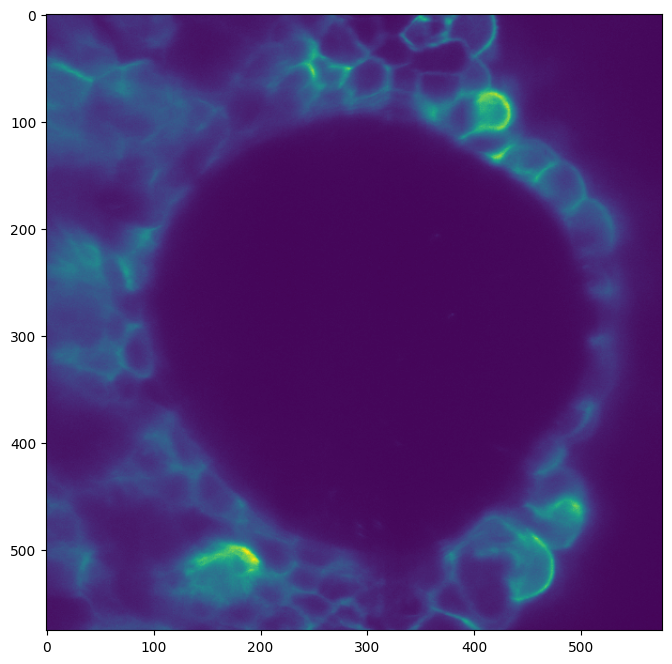

3420


In [3]:
plt.figure(figsize=(16,8))
plt.imshow(imgs[300])
plt.show()
print(len(imgs))

214344
(192600, 64, 64, 1) (21744, 64, 64, 1)


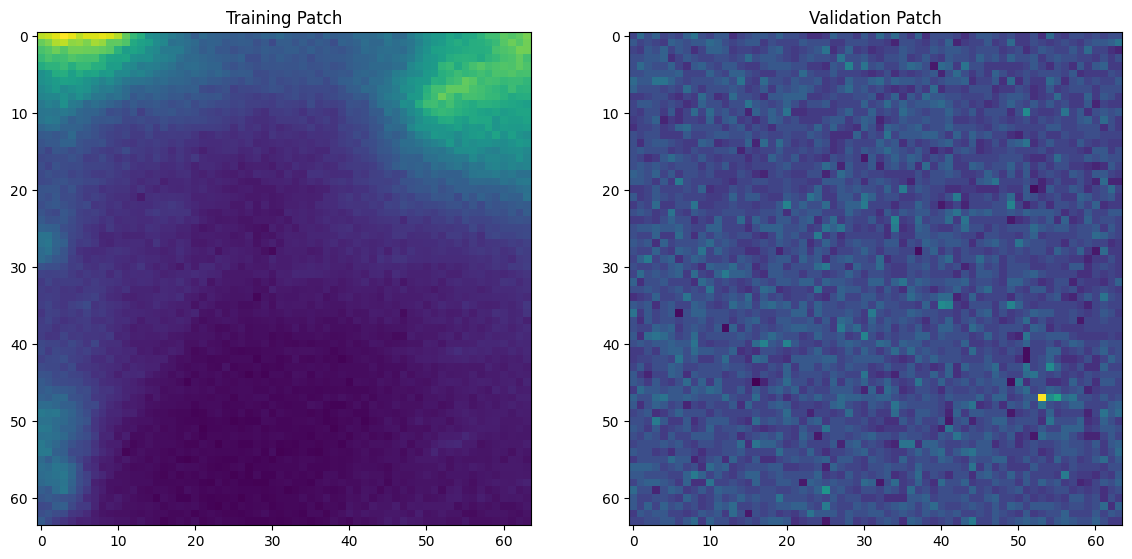

In [5]:
patch_shape=(64,64)
patches = []
for im in imgs:
    # plt.figure(figsize=(16,8))
    # plt.imshow(im)
    # plt.show()
    # patches = datagen.generate_patches_from_list(im, shape=patch_shape)
    for i in range(0, im.shape[0]-patch_shape[0], patch_shape[0]):
        for j in range(0, im.shape[1]-patch_shape[1], patch_shape[1]):
            patch = im[i:i+patch_shape[0], j:j+patch_shape[1]]
            # print(np.array(patch).shape)
            patches.append(patch)

print(len(patches))
np.random.shuffle(patches)
patches = np.array(patches)
X = patches[:192600]
X_val = patches[192600:]
plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
plt.imshow(X[0,...])
plt.title('Training Patch');
plt.subplot(1,2,2)
plt.imshow(X_val[0,...])
plt.title('Validation Patch');
print(X.shape, X_val.shape)

In [6]:
config = N2VConfig(X, unet_kern_size=3, 
                   unet_n_first=64, unet_n_depth=3, train_steps_per_epoch=int(X.shape[0]/128/20), train_epochs=25, train_loss='mse', 
                   batch_norm=True, train_batch_size=128, n2v_perc_pix=0.198, n2v_patch_shape=(64, 64), 
                   n2v_manipulator='uniform_withCP', n2v_neighborhood_radius=5, single_net_per_channel=False)

# Let's look at the parameters stored in the config-object.
vars(config)

{'means': ['87.125565'],
 'stds': ['140.41862'],
 'n_dim': 2,
 'axes': 'YXC',
 'n_channel_in': 1,
 'n_channel_out': 1,
 'unet_residual': False,
 'unet_n_depth': 3,
 'unet_kern_size': 3,
 'unet_n_first': 64,
 'unet_last_activation': 'linear',
 'unet_input_shape': (None, None, 1),
 'train_loss': 'mse',
 'train_epochs': 25,
 'train_steps_per_epoch': 75,
 'train_learning_rate': 0.0004,
 'train_batch_size': 128,
 'train_tensorboard': True,
 'train_checkpoint': 'weights_best.h5',
 'train_reduce_lr': {'factor': 0.5, 'patience': 10},
 'batch_norm': True,
 'n2v_perc_pix': 0.198,
 'n2v_patch_shape': (64, 64),
 'n2v_manipulator': 'uniform_withCP',
 'n2v_neighborhood_radius': 5,
 'single_net_per_channel': False,
 'blurpool': False,
 'skip_skipone': False,
 'structN2Vmask': None,
 'probabilistic': False}

In [7]:
# a name used to identify the model --> change this to something sensible!
model_name = '2d_images_from_stack_version2'
# the base directory in which our model will live
basedir = 'models_test'
# We are now creating our network model.
model = N2V(config, model_name, basedir=basedir)

/home/ppujol@ibec.local/python_codes/light_sheet_domes/venv_tf/lib/python3.10/site-packages/n2v/models/n2v_standard.py:447: UserWarning: output path for model already exists, files may be overwritten: /home/ppujol@ibec.local/python_codes/light_sheet_domes/noise2Void/n2v_2d_black_line/models_test/2d_images_from_stack_version2
  warnings.warn(


In [8]:
history = model.train(X, X_val)

8 blind-spots will be generated per training patch of size (64, 64).


Preparing validation data: 100%|██████████| 21744/21744 [00:04<00:00, 4831.69it/s]

Epoch 1/25


75/75 [==============================] - 449s 6s/step - loss: 0.1117 - n2v_mse: 0.1117 - n2v_abs: 0.1410 - val_loss: 0.5926 - val_n2v_mse: 0.5927 - val_n2v_abs: 0.4657 - lr: 4.0000e-04
Epoch 2/25
75/75 [==============================] - 436s 6s/step - loss: 0.0303 - n2v_mse: 0.0303 - n2v_abs: 0.0893 - val_loss: 0.4391 - val_n2v_mse: 0.4392 - val_n2v_abs: 0.4113 - lr: 4.0000e-04
Epoch 3/25
75/75 [==============================] - 430s 6s/step - loss: 0.0226 - n2v_mse: 0.0226 - n2v_abs: 0.0800 - val_loss: 0.3374 - val_n2v_mse: 0.3374 - val_n2v_abs: 0.3486 - lr: 4.0000e-04
Epoch 4/25
75/75 [==============================] - 442s 6s/step - loss: 0.0222 - n2v_mse: 0.0222 - n2v_abs: 0.0759 - val_loss: 0.1693 - val_n2v_mse: 0.1694 - val_n2v_abs: 0.2703 - lr: 4.0000e-04
Epoch 5/25
75/75 [==============================] - 448s 6s/step - loss: 0.0185 - n2v_mse: 0.0185 - n2v_abs: 0.0720 - val_loss: 0.1141 - val_n2v_mse: 0.1142 - val_n2v_abs: 0.2061 - lr: 4.0000e-04
Epoch 6/25
75/75 [=============

['loss', 'lr', 'n2v_abs', 'n2v_mse', 'val_loss', 'val_n2v_abs', 'val_n2v_mse']


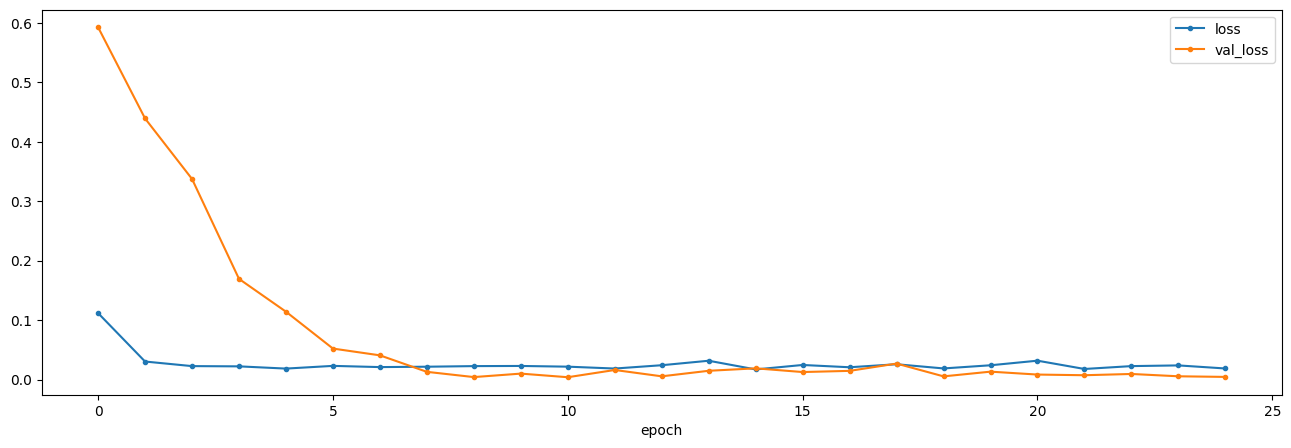

In [9]:
print(sorted(list(history.history.keys())))
plt.figure(figsize=(16,5))
plot_history(history,['loss','val_loss']);

In [10]:
model.export_TF(name='ModelFrom2DimagesSameDomeversion2', 
                description='2D image trained using black line removal and also from the same dome first 90 percent of >214000 64*64, low train step per epoch.', 
                authors=["domedeum"],
                test_img=X_val[0], axes='YXC',
                patch_shape=patch_shape)

1/1 [==============================] - 0s 170ms/step
INFO:tensorflow:Assets written to: /home/ppujol@ibec.local/python_codes/light_sheet_domes/noise2Void/n2v_2d_black_line/models_test/2d_images_from_stack_version2/tf_model/assets


INFO:tensorflow:Assets written to: /home/ppujol@ibec.local/python_codes/light_sheet_domes/noise2Void/n2v_2d_black_line/models_test/2d_images_from_stack_version2/tf_model/assets
site.config.json: 6.68kiB [00:00, 20.9MiB/s]                  
/home/ppujol@ibec.local/python_codes/light_sheet_domes/venv_tf/lib/python3.10/site-packages/bioimageio/spec/shared/_resolve_source.py:482: UserWarning: Download (6678) does not have expected size (2331).
  warnings.warn(f"Download ({t.n}) does not have expected size ({total_size}).")
collection.json: 235kiB [00:00, 30.6MiB/s]                   
/home/ppujol@ibec.local/python_codes/light_sheet_domes/venv_tf/lib/python3.10/site-packages/bioimageio/spec/shared/_resolve_source.py:482: UserWarning: Download (234743) does not have expected size (28553).
  warnings.warn(f"Download ({t.n}) does not have expected size ({total_size}).")



Model exported in BioImage ModelZoo format:
/home/ppujol@ibec.local/python_codes/light_sheet_domes/noise2Void/n2v_2d_black_line/models_test/2d_images_from_stack_version2/2d_images_from_stack_version2.bioimage.io.zip


/home/ppujol@ibec.local/python_codes/light_sheet_domes/venv_tf/lib/python3.10/site-packages/bioimageio/spec/shared/schema.py:46: ValidationWarning: tags: Missing tags corresponding to bioimage.io categories: [{'modality': ['electron-microscopy', 'cryo-electron-microscopy', 'fluorescence-light-microscopy', 'transmission-light-microscopy', 'super-resolution-microscopy', 'x-ray-microscopy', 'force-microscopy', 'high-content-imaging', 'whole-slide-imaging', 'other']}, {'content': ['cells', 'nuclei', 'extracellular-vesicles', 'tissue', 'plant', 'mitochondria', 'vasculature', 'cell-membrane', 'brain', 'whole-organism']}, {'method': ['stardist', 'cellpose', 'yolo', 'care', 'n2v', 'denoiseg']}]
  warnings.warn(msg, category=ValidationWarning)
